# Item II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
matrix = np.array([[-2,1,4],[3,0,-1],[5,1,2],[-1,3,6],[2,-7,4],[-1,0,-1]])
print(matrix)

[[-2  1  4]
 [ 3  0 -1]
 [ 5  1  2]
 [-1  3  6]
 [ 2 -7  4]
 [-1  0 -1]]


In [28]:
#Calcule el vector de medias, la matriz de covarianzas y la matriz de correlaciones muestrales de x
# Calcular el vector de medias
media = np.mean(matrix, axis=0)

# Calcular la matriz de covarianzas
covarianza = np.cov(matrix, rowvar=False)

# Calcular la matriz de correlaciones
correlaciones = np.corrcoef(matrix, rowvar=False)

print("Vector de medias:")
print(media)
print("\nMatriz de covarianzas:")
print(covarianza)
print("\nMatriz de correlaciones:")
print(correlaciones)

Vector de medias:
[ 1.         -0.33333333  2.33333333]

Matriz de covarianzas:
[[ 7.6        -2.4        -2.4       ]
 [-2.4        11.86666667  0.13333333]
 [-2.4         0.13333333  8.26666667]]

Matriz de correlaciones:
[[ 1.         -0.25272027 -0.3027884 ]
 [-0.25272027  1.          0.01346199]
 [-0.3027884   0.01346199  1.        ]]


In [29]:
#Calcule la matriz de covarianzas de los datos estandarizados univariados y los datos estandarizados multivariados 

# Calcular la matriz de covarianzas de los datos estandarizados univariados
matrix_estandarizada_univariada = (matrix - np.mean(matrix)) / np.std(matrix, axis=0)
covarianza_estandarizada_univariada = np.cov(matrix_estandarizada_univariada, rowvar=False)
covarianza_estandarizada_univariada

# Calcular la matriz de covarianzas de los datos estandarizados multivariados



array([[ 1.2       , -0.30326432, -0.36334608],
       [-0.30326432,  1.2       ,  0.01615438],
       [-0.36334608,  0.01615438,  1.2       ]])

In [15]:
np.cov(matrix, rowvar=False)

array([[ 7.6       , -2.4       , -2.4       ],
       [-2.4       , 11.86666667,  0.13333333],
       [-2.4       ,  0.13333333,  8.26666667]])

# Item 3

In [34]:
data = pd.read_csv("crabs_dataset.csv")
data.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


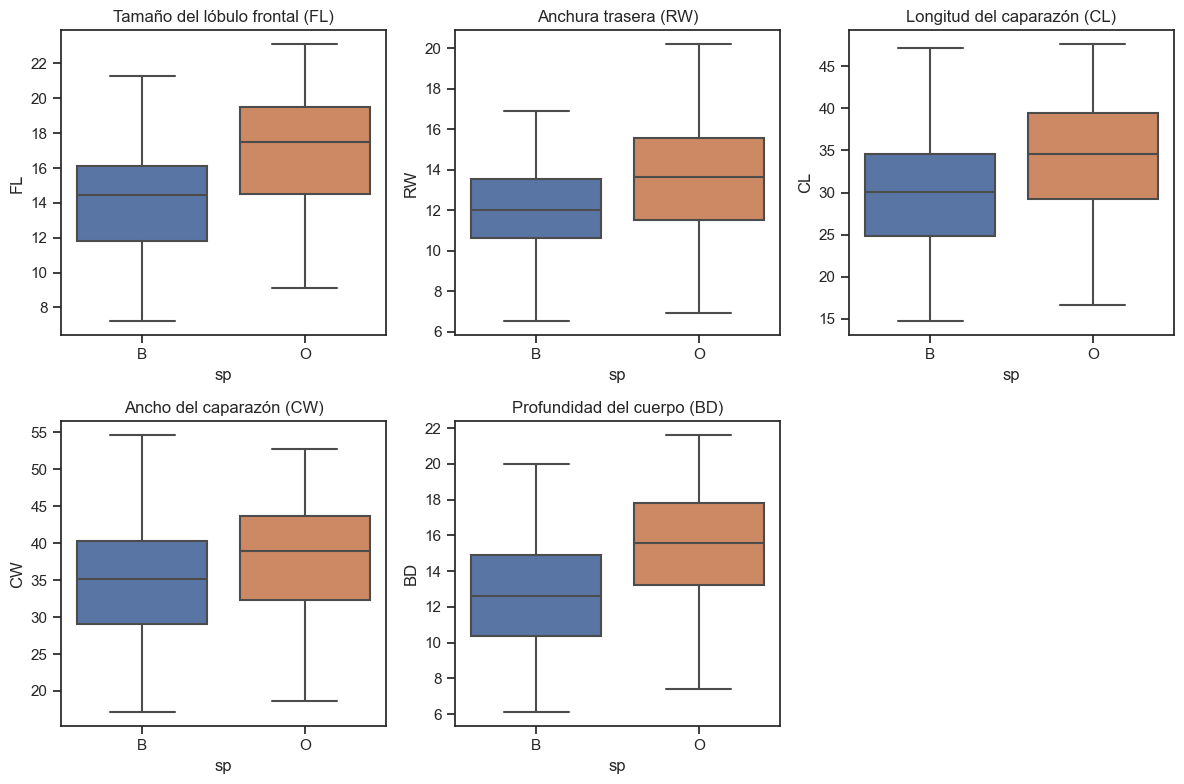

In [49]:
#Realice el boxplot de cada medida numérica para cada especie en un solo grafico en python
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x="sp", y="FL", data=data)
plt.title("Tamaño del lóbulo frontal (FL)")

plt.subplot(2, 3, 2)
sns.boxplot(x="sp", y="RW", data=data)
plt.title("Anchura trasera (RW)")

plt.subplot(2, 3, 3)
sns.boxplot(x="sp", y="CL", data=data)
plt.title("Longitud del caparazón (CL)")

plt.subplot(2, 3, 4)
sns.boxplot(x="sp", y="CW", data=data)
plt.title("Ancho del caparazón (CW)")

plt.subplot(2, 3, 5)
sns.boxplot(x="sp", y="BD", data=data)
plt.title("Profundidad del cuerpo (BD)")

plt.tight_layout()
plt.show()

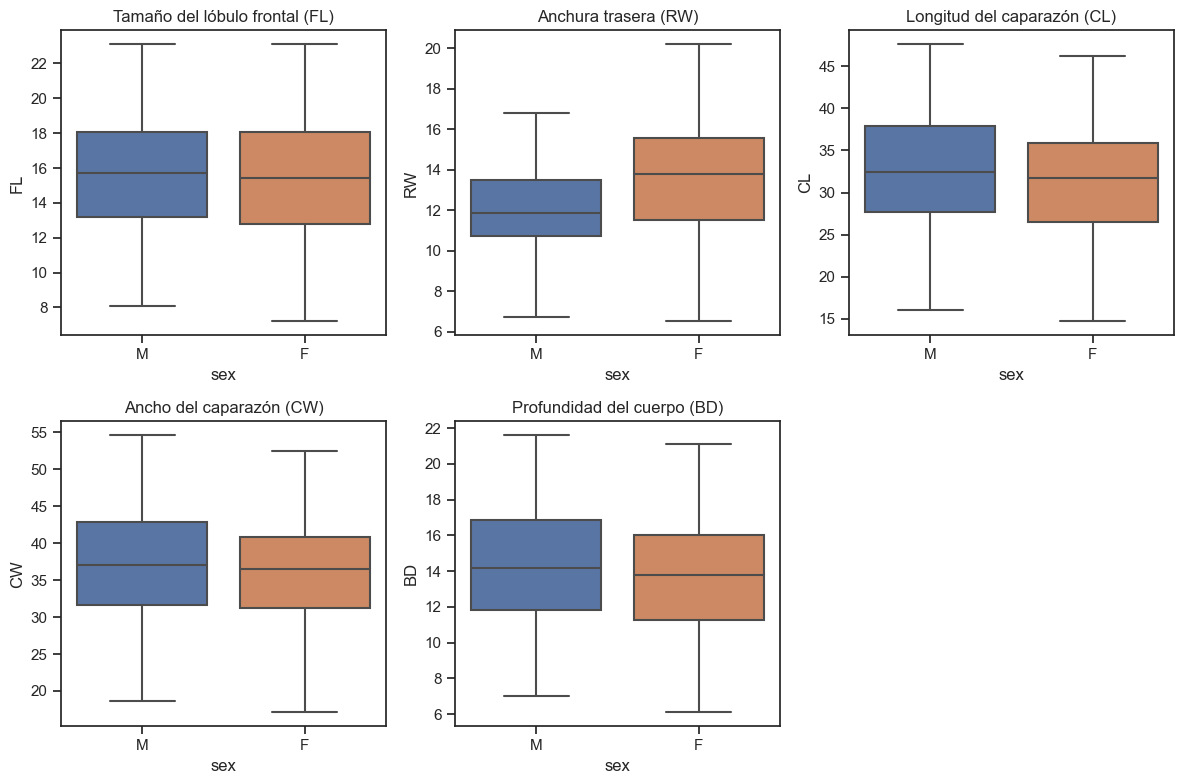

In [48]:
#Realice el boxplot de cada medida numérica para cada sexo
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x="sex", y="FL", data=data)
plt.title("Tamaño del lóbulo frontal (FL)")

plt.subplot(2, 3, 2)
sns.boxplot(x="sex", y="RW", data=data)
plt.title("Anchura trasera (RW)")

plt.subplot(2, 3, 3)
sns.boxplot(x="sex", y="CL", data=data)
plt.title("Longitud del caparazón (CL)")

plt.subplot(2, 3, 4)
sns.boxplot(x="sex", y="CW", data=data)
plt.title("Ancho del caparazón (CW)")

plt.subplot(2, 3, 5)
sns.boxplot(x="sex", y="BD", data=data)
plt.title("Profundidad del cuerpo (BD)")

plt.tight_layout()
plt.show()

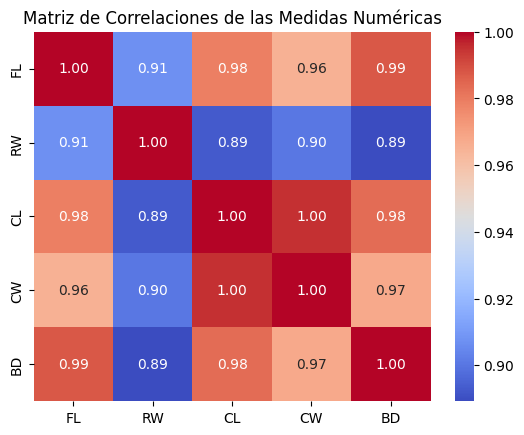

In [43]:
#Calcule el vector de medias, la matriz de covarianzas y la matriz de correlaciones de las cinco medidas numéricas.
#Muestra la matriz de correlaciones con el heatmap
# Calcular el vector de medias
data_numericas = data[["FL", "RW", "CL", "CW", "BD"]]
media_data = np.mean(data_numericas, axis=0)

# Calcular la matriz de covarianzas
covarianza_data = np.cov(data_numericas, rowvar=False)

# Calcular la matriz de correlaciones
correlaciones_data = np.corrcoef(data_numericas, rowvar=False)

sns.heatmap(correlaciones_data, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=data_numericas.columns, yticklabels=data_numericas.columns)
plt.title("Matriz de Correlaciones de las Medidas Numéricas")
plt.show()



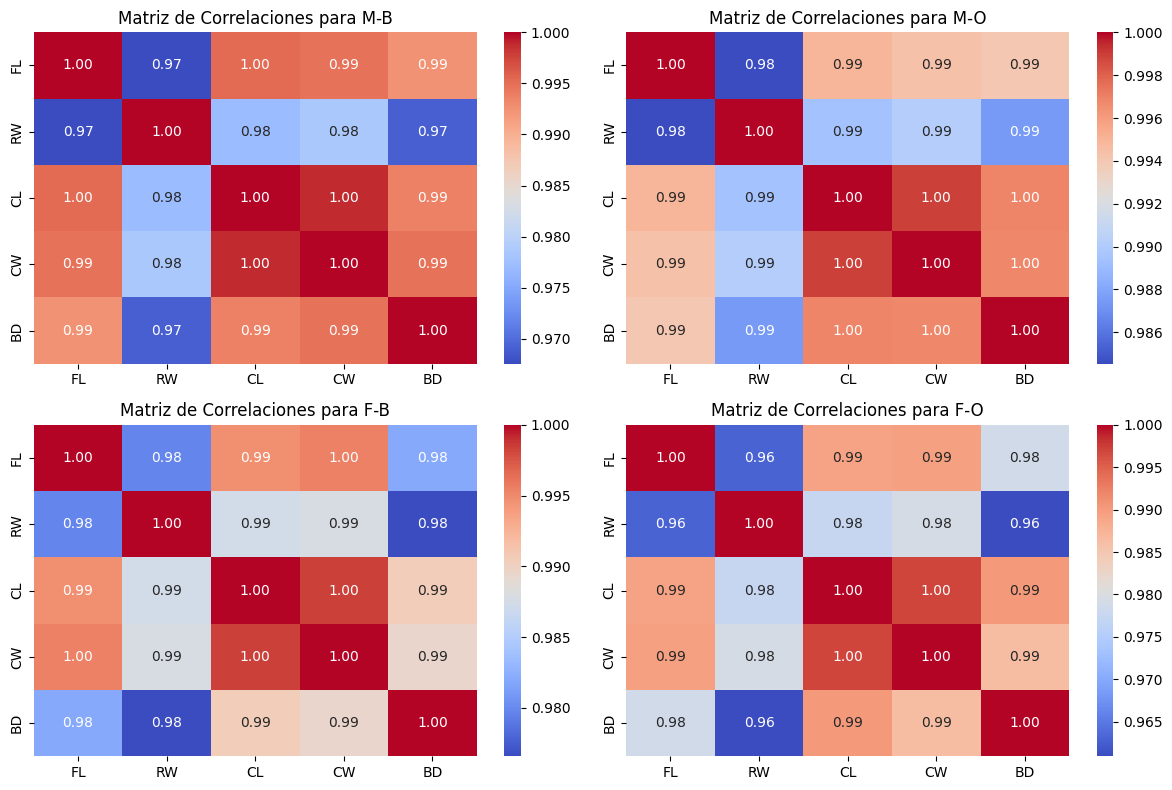

In [44]:
#Calcule la matriz de correlaciones de las cinco medidas numéricas para cada combinación de los sexo y especie. 
#Muestra las matrices de correlación con el heatmap

# Calcular las matrices de correlaciones para cada combinación de sexo y especie
matrices_de_correlaciones = {}
for sex in data["sex"].unique():
    for sp in data["sp"].unique():
        subset = data_numericas[(data["sex"] == sex) & (data["sp"] == sp)]
        matriz_de_correlaciones = subset.corr()
        matrices_de_correlaciones[f"{sex}-{sp}"] = matriz_de_correlaciones

# Mostrar las matrices de correlación con heatmaps
plt.figure(figsize=(12, 8))
for i, (key, matriz_de_correlaciones) in enumerate(matrices_de_correlaciones.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(matriz_de_correlaciones, annot=True, cmap="coolwarm", fmt=".2f",
                xticklabels=data_numericas.columns, yticklabels=data_numericas.columns)
    plt.title(f"Matriz de Correlaciones para {key}")

plt.tight_layout()
plt.show()

c:\Users\16joa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


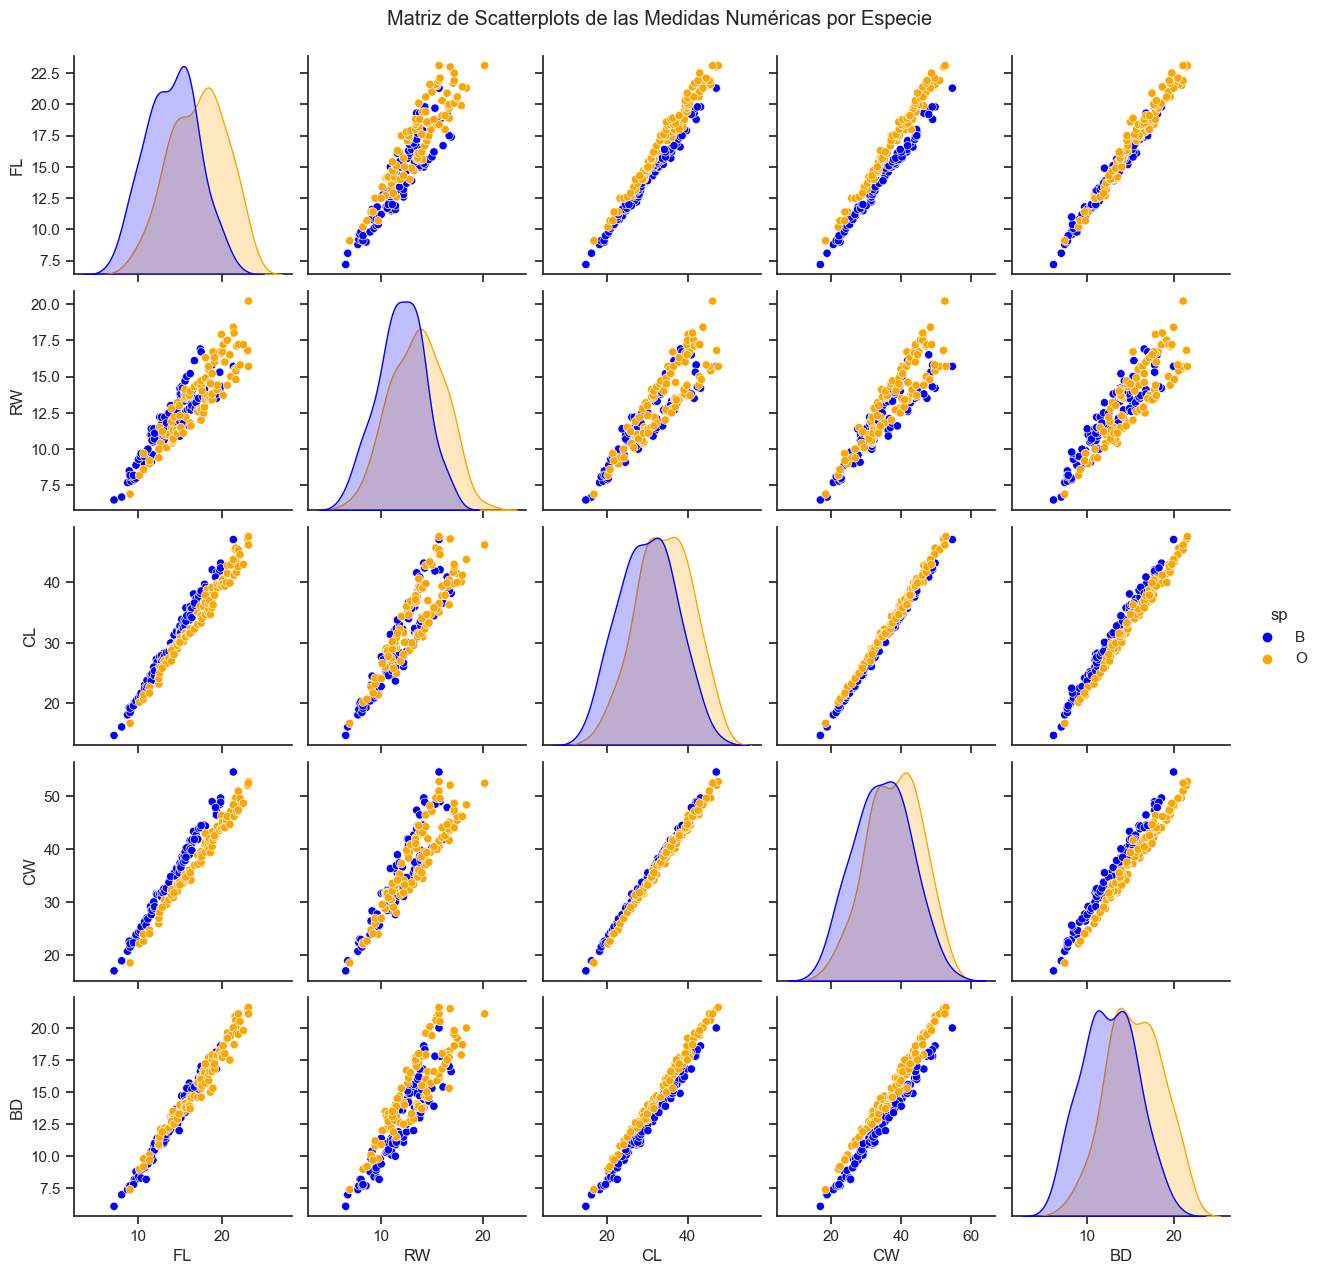

In [46]:
#Realice scatterplot matriz de las cinco medidas numéricas con color para cada especie.
sns.set(style="ticks")
sns.pairplot(data, hue="sp", vars=["FL", "RW", "CL", "CW", "BD"], palette={"B": "blue", "O": "orange"})
plt.suptitle("Matriz de Scatterplots de las Medidas Numéricas por Especie", y=1.02)
plt.show()

c:\Users\16joa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


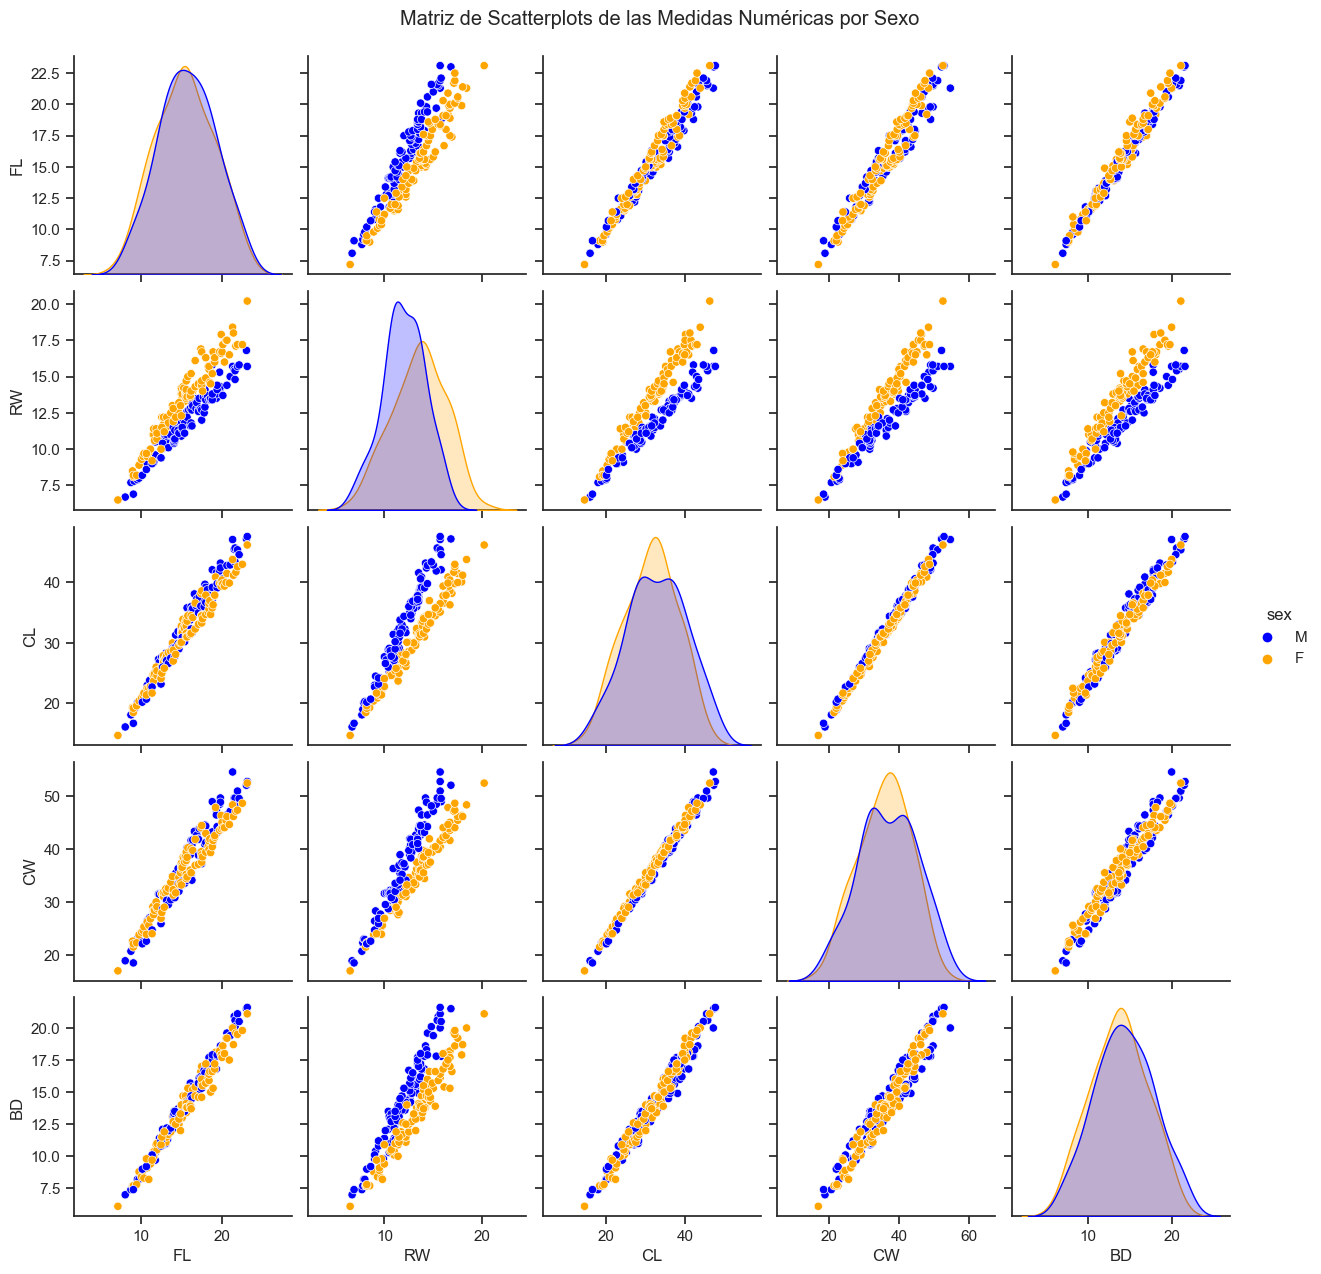

In [47]:
#Realice scatterplot matriz de las cinco medidas numéricas con color para cada sexo.

sns.set(style="ticks")
sns.pairplot(data, hue="sex", vars=["FL", "RW", "CL", "CW", "BD"], palette={"M": "blue", "F": "orange"})
plt.suptitle("Matriz de Scatterplots de las Medidas Numéricas por Sexo", y=1.02)
plt.show()

In [ ]:
#Comente sobre los resultados de gráficos hecho. 
#Se observa datos atípicos? Hay correlacionesentre las variables? 
#Qué tan fuerte son las correlaciones? Hay variables con los cuales podemos distinguir especie o sexo de los cangrejos
